# Лабораторная работа 1
# Траектория движения тела. Графики функций

Шпак Андрей Валерьевич, 15.07.2022

## Задание 1.1. (Траектория движения тела)

Тело запущено под углом $\alpha$ к горизонту на высоте $h_{start}$ и через время $t=T$ достигает другое тело, расположенное на расстоянии $s_{end}$ и высоте $h_{end}$. Начальный момент времени движения тела полагаем равным нулю $t=0$.

Движение запущенного тела осуществляется только под действием силы тяжести
$$\textbf{F}=m(0,-g),$$ 
где $m$ &mdash; масса тела, $g$ &mdash; ускорение свободного падения.

Тело будем считать материальной точкой массы $m$. Начальный момент времени движения тела полагаем равным нулю $t=0$. Сопротивлением среды пренебрегаем.

$\color{red}{Определите}$ функцию перемещения тела $\left( s_{x}\left( t \right), s_{y} \left( t \right) \right)$ под действием силы тяжести, где $\left( s_{x}\left( t \right), s_{y} \left( t \right) \right)$ &mdash; горизонтальная и вертикальная составляющая положения тела в момент времени t, соответственно.

$\color{red}{Найдите}$ угол запуска тела $\alpha$.

$\color{red}{Постройте}$ график траектории движения тела $\left( s_{x}\left( t \right), s_{y} \left( t \right) \right)$ для $t \in [0,T]$

Выполните задание при $h_{start}=10$ m,$T=2.5s,s_{end}=55$ m, $h_{end}=12 $m, $g \approx 9.807$ $m / s^2.$

## Реализация Задания 1.1 
## Этап 1. Подключения модулей

In [2]:
import math

In [3]:
math.sin(math.pi/2)

1.0

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.constants as const
import sympy
import random2 as rnd

In [5]:
g = const.g
g

9.80665

In [6]:
const.unit('standard acceleration of gravity')

'm s^-2'

## Этап 2. Определение переменных

In [7]:
h_start = 10 # вертикальная составляющая положения тела в момент запуска
T = 2.5 # время полета
s_end = 5.5e1 # горизонтальное перемещение тела за время полета
h_end = 1.2E+1 # вертикальная составляющая положения тела в конечный момент движения
g = 9.807 # ускорение свободного падения
vars = h_start, T, s_end, h_end, g

In [8]:
[type(x) for x in vars] # синтаксис спискового включения для создания списка

[int, float, float, float, float]

In [9]:
[type(type(x)) for x in vars]
# type - это тип всех типов, для которых не указан явно иной метакласс
# а тип object - это база для остальных типов

[type, type, type, type, type]

### $\color{red}{ВОПРОС}:$ не понимаю следующую фразу "type - это тип всех типов, для которых не указан явно иной метакласс". В чем отличие type от object?

In [10]:
g # переменная не отобразится
vars # переменная отобразится

(10, 2.5, 55.0, 12.0, 9.807)

In [11]:
print(g, vars, T)

9.807 (10, 2.5, 55.0, 12.0, 9.807) 2.5


In [12]:
step = 0.01
t_list = [i * step for i in range(int(T/0.01))]
# здесь я создал список - [0, 2.5) с шагом 0.01 с помощью механизма списковых включений для переменной времени T
t_array = np.arange(0, T, step)
# на основе массива из расширения numpy
# интервалы получились полуоткрытые, включающие начало, исключающие конец
type(t_list), type(t_array)

(list, numpy.ndarray)

In [13]:
len(t_list), len(t_array)

(250, 250)

In [14]:
# после создания списка, его размер изменить можно, после создания массива - нельзя
t_list.append(t_list[-1] + step)
len(t_list)

251

## Этап 3. Аналитический вид функции перемещения

Помещаю начало прямоугольной декартовой системы координат на уровне земли, тогда в начальный момент движения тела $t = 0$ имею 
$$s_x \left( 0 \right) = 0,$$ 
$$s_y \left( 0 \right) = h_{start}.$$ 
Для построения функции перемещения 
$\left( s_{x}\left( t \right), s_{y} \left( t \right) \right)$ 
воспользуюсь вторым законом Ньютона 
$$m \textbf{a} = \textbf{F},$$ 
где $m$ &mdash; масса тела, ускорение движения тела 
$\textbf{a} = \left( s_{x}^"\left( t \right), s_{y}^" \left( t \right) \right)$ 
и приложенная сила 
$\textbf{F} = m \left( 0, -g \right)$. 
Приравняв силы $\textbf{F}$, в результате имеем, что 
$$s_{x}^"\left( t \right) = 0$$ 
$$s_{y}^"\left( t \right) = -g.$$
На основании уравнений можно записать аналитический вид для функций $s_{x}\left( t \right)$ и $s_{y} \left( t \right)$

$\textbf{По формуле координаты перемещения:}$ $x_0 + v 0_{x} t + \dfrac{a_x}{2} t^2$
$$s_{x}\left( t \right) = s_{x}\left( 0 \right) + v 0_{x} t = 0 + v 0_{x} t,$$
$$s_{y}\left( t \right) = s_{y}\left( 0 \right) + v 0_{x} t - \dfrac{g}{2} t^2 = h_{start} + v 0_{x} t - \dfrac{g}{2} t^2,$$
где $\textbf{v0} = \left( v0_x, v0_y \right)$ обозначает неизвестную скорость движения тела в начальный момент времени $t = 0.$

Из заданного соотношения нахожу $s_x \left( T \right) = s_{end}$ находим значение для $v0_x$

In [15]:
v0_x = s_end / T
v0_x

22.0

Из заданного соотношения нахожу $s_y \left( T \right) = h_{end}$ находим значение для $v0_y$

In [16]:
# от конечно координаты отнимаю координату по формуле
v0_y = (h_end - h_start + g / 2 * T ** 2) / T
v0_y

13.05875

Значение угла $\alpha$ определяю из соотношения $\tan \alpha = \dfrac{v0_y}{v0_x}$

In [17]:
alpha = math.atan(v0_y / v0_x)
alpha, math.degrees(alpha)

(0.53568520293127, 30.692501275570805)

## Этап 4. График функции перемещения

In [18]:
# списки чисел, соответствующие горизонтальным и вертикальным составляющим положения тела в момент времени t
s_x_list = [v0_x * t for t in t_list]
s_y_list = [h_start + v0_y * t - g * t ** 2 / 2 for t in t_list]

In [19]:
# массивы чисел, соответствующие горизонтальным и вертикальным составляющим тела в момент времени t
s_x_array = v0_x * t_array
s_y_array = h_start + v0_y * t_array - g * t_array ** 2 /2

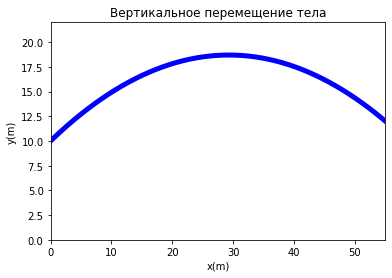

In [20]:
plt.figure()
# контейнер (область), на которой все нарисовано
plt.plot(s_x_list, s_y_list, 'b-', lw = 5)
# голубая сплошная линия толщиной 5 чего-то (Set the line width in points - из документации, не знаю, о каких точках речь; 
# или же имеются в виду точки самого графика)
plt.title('Вертикальное перемещение тела')
plt.xlabel('x(m)'); plt.ylabel('y(m)') #символ ; позволяет записывать несколько выражений 
plt.axis([0, s_end, 0, h_end + 10]);
# альтернативный синтаксис для установки пределов по осям:
# plt.xlim(0, s_end)
# plt.ylim(0, h_end + 10)

### $\color{red}{ВОПРОС}:$ в чем задает длину аргумент lw?

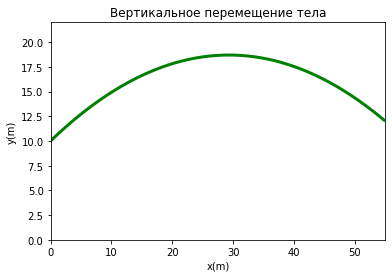

In [21]:
plt.figure()
plt.plot(s_x_array, s_y_array, color = 'green', lw = 3)
plt.title('Вертикальное перемещение тела')
plt.xlabel('x(m)'); plt.ylabel('y(m)')
# альтернативный синтаксис для установки пределов по осям
plt.xlim(0, s_end)
plt.ylim(0, h_end + 10);

## Задание 1.2. (Графики функций в полярной и декартовой системах координат)

$\color{red}{Постройте}$ графики функций по координатам точек согласно варианту. Функция задана:

а) в полярной системе координат $\left( \varphi, \rho \right)$ полярным уравнением $\rho = \rho \left( \varphi \right)$;

б) в декартовой системе координат $\left( x, y \right)$ параметрическими уравнениями $\mathit{x} = x \left( t \right)$, $y = y \left( t \right)$.

1. а) $\textit{Декартов лист}$ $\rho = \dfrac{3a \sin{\varphi} \cos{\varphi}}{\sin^3 \varphi + \cos^3 \varphi}, a \in \mathbb{R}$

   б) $x = \dfrac{3t^2 + 1}{3t^3}, y = \sin \left( \dfrac{t^3}{3} + t \right)$

$\textbf{Комментарии:}$

$\textbf{Пример}$ построения графика функции $\rho = \varphi$, $\varphi \in \left[ -\dfrac{ \pi}{2}, \dfrac{\pi}{2} \right]$ в полярной системе координат. 

$\textit{Замечание:}$ Полярный радиус $\rho$ может принимать только неотрицательные значения, поэтому график фуункции строится для функции $\left| \rho \right|$ с дополнительной корректировкой значения угла $\varphi$ для отрицательных значений радиуса <code>plt.plot(phi + (r < 0) * np.pi, abs(r), 'r.')</code>


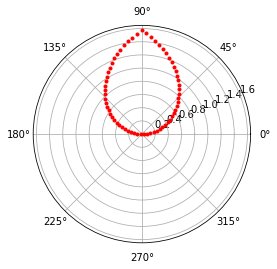

In [22]:
plt.figure()
plt.axes(projection = 'polar')
# добавляю полярные оси
phi = np.arange(-np.pi / 2, np.pi / 2, 0.05)
r = phi
plt.plot(phi + (r < 0) * np.pi, abs(phi), 'r.');

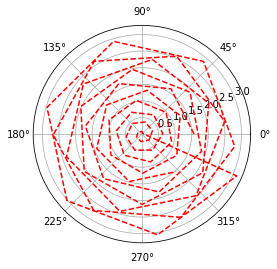

In [23]:
# без значений
plt.figure()
plt.axes(projection = 'polar')
phi = np.arange(-np.pi / 2, np.pi / 2, 0.05)
r = phi
plt.plot(phi + (r < 0) * np.pi, 'r--');

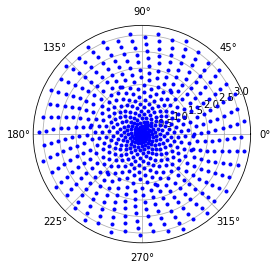

In [24]:
# другие интересные результаты с увеличением шага
plt.figure()
plt.axes(projection = 'polar')
phi = np.arange(-np.pi / 2, np.pi / 2, 0.005)
r = phi
plt.plot(phi + (r < 0) * np.pi, 'b.');

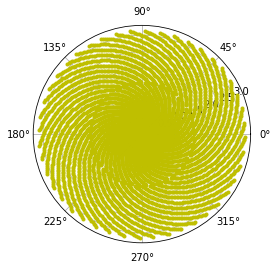

In [25]:
plt.figure()
plt.axes(projection = 'polar')
phi = np.arange(-np.pi / 2, np.pi / 2, 0.0005)
r = phi
plt.plot(phi + (r < 0) * np.pi, 'y.');

In [26]:
# разбираюсь с тем выражением-корректировкой
ar = np.arange(-30, 30)
ar

array([-30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18,
       -17, -16, -15, -14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,
        -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,
         9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,
        22,  23,  24,  25,  26,  27,  28,  29])

In [27]:
ar + (ar < 0) * np.pi, abs(ar)

(array([-26.85840735, -25.85840735, -24.85840735, -23.85840735,
        -22.85840735, -21.85840735, -20.85840735, -19.85840735,
        -18.85840735, -17.85840735, -16.85840735, -15.85840735,
        -14.85840735, -13.85840735, -12.85840735, -11.85840735,
        -10.85840735,  -9.85840735,  -8.85840735,  -7.85840735,
         -6.85840735,  -5.85840735,  -4.85840735,  -3.85840735,
         -2.85840735,  -1.85840735,  -0.85840735,   0.14159265,
          1.14159265,   2.14159265,   0.        ,   1.        ,
          2.        ,   3.        ,   4.        ,   5.        ,
          6.        ,   7.        ,   8.        ,   9.        ,
         10.        ,  11.        ,  12.        ,  13.        ,
         14.        ,  15.        ,  16.        ,  17.        ,
         18.        ,  19.        ,  20.        ,  21.        ,
         22.        ,  23.        ,  24.        ,  25.        ,
         26.        ,  27.        ,  28.        ,  29.        ]),
 array([30, 29, 28, 27, 26, 25, 24, 23

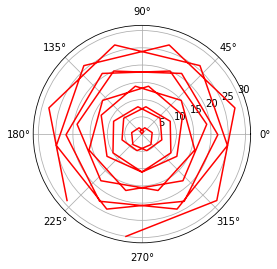

In [28]:
plt.figure()
plt.axes(projection = 'polar')
plt.plot(ar + (ar < 0) * np.pi, abs(ar), 'r-');

## Реализация Задания 1.2

In [29]:
# б)
# с помощью списка:
step = 0.01
t_list = [step * i for i in range(-1000, 1000)]
# сейчас, пересматривая эту работу, заметил строчку выше, но не стал исправлять, потому что это выглядит интересно
# убираю плохие значения, пока что не знаю более элегантного способа это сделать, кроме как прибавить какую-нибудь
# случайную константу: step * i + 0.23423 - например, а можно просто
t_list.remove(0)
t_list.remove(-3)
x_list = [(3 * t ** 2 + 1) / 3 * t ** 3 for t in t_list]
y_list = [math.sin(t ** 3 / (3 + t)) for t in t_list]

(-5000.0, 500.0, -2.0, 2.0)

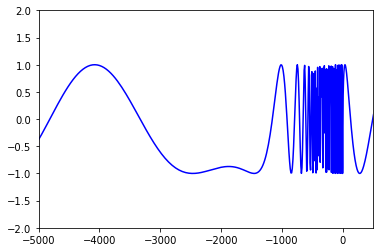

In [30]:
plt.figure()
plt.plot(x_list, y_list, 'b-')
plt.axis([-5000, 500, -2, 2])

In [31]:
# с помощью массива (и опять списка):
t_array = np.arange(-100, 100, step)
x_array = (3 * t_array ** 2 + 1) / 3 * t_array ** 3

# ошибка, если передаю весь массив в метод sin объекта math
# y_array = math.sin(t_array ** 3 / 3 + t_array)
# поэтому снова получаю список с помощью спискового включения значений массива t_array
y_new_list = [math.sin(i ** 3 / (3 + i)) for i in t_array]
# Почему не возникает ситуации с плохими значениями 0 и -3? Потому что у меня тут шаг step
# [print(i) for i in t_array]

(-5000.0, 500.0, -2.0, 2.0)

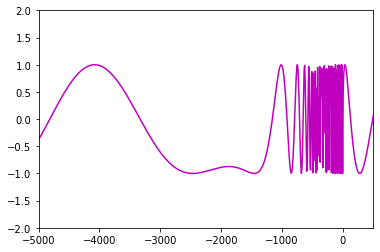

In [32]:
plt.figure()
plt.plot(x_array, y_new_list, 'm-')
plt.axis([-5000, 500, -2, 2])

In [33]:
# а) Не получилось
# я не понял способ из примера,
# потому что обычно я просто нахожу область определения, подставляю точки и отображаю
# так и сделал, область определения: pi * n < x < pi * n + pi / 2
step = 0.01
# для каждого промежутка по два массива значений углов
phi_1 = np.arange(0, np.pi / 2, step)
phi_2 = np.arange(np.pi, 3 * np.pi / 2, step)

# сначала я думал, что дело в предоставляемых данных, но это не так
# phi_1 = np.array(phi_1)
# phi_2 = np.array(phi_2)
# phi = np.concatenate((phi_1, phi_2))

# r = [(3 * math.sin(i) * math.cos(i)) / (math.sin(i) ** 3 + math.cos(i) ** 3) for i in phi]

# радиусы, соответствующие углам
r_1 = [(3 * math.sin(i) * math.cos(i)) / (math.sin(i) ** 3 + math.cos(i) ** 3) for i in phi_1]
r_2 = [(3 * math.sin(i) * math.cos(i)) / (math.sin(i) ** 3 + math.cos(i) ** 3) for i in phi_2]

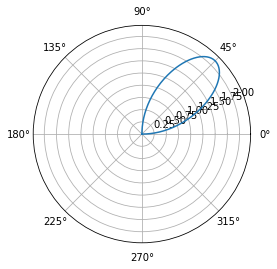

In [34]:
# вывод по отдельности
plt.figure()
plt.axes(projection = 'polar')
plt.plot(phi_1, r_1)

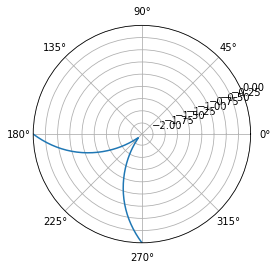

In [35]:
plt.figure()
plt.axes(projection = 'polar')
plt.plot(phi_2, r_2)

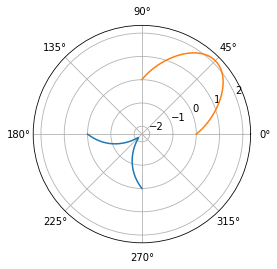

In [36]:
# и все вместе - ничего не вышло
plt.figure()
plt.axes(projection = 'polar')
plt.plot(phi_2, r_2, phi_1, r_1)

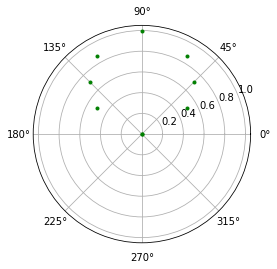

In [37]:
# пытался разбираться с другими примерами
a = [0, np.pi / 6, np.pi / 4, np.pi / 3, np.pi / 2, 2 * np.pi / 3, 3 * np.pi / 4, 5 * np.pi / 6, np.pi]
ro = [math.sin(i) for i in a]
plt.figure()
plt.axes(projection = 'polar')
plt.plot(a, ro, 'g.')

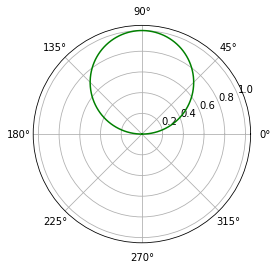

In [38]:
a = np.arange(0, np.pi, step)
ro = [math.sin(i) for i in a]
plt.figure()
plt.axes(projection = 'polar')
plt.plot(a, ro, 'g-')

## Задание 1.3. (Секущая и касательная к заданной функции)

$\color{red}{Постройте}$ в одной графической области
* график движения тела $(s_{x}(t),s_{y}(t))$ для $t \in [0,T]$,
* график секущей прямой, проходящей через начальную и конечную точки траектории движения тела,
* график касательной прямой к траектории движения тела в начальный момент времени

In [39]:
step = 0.01
t_list = [i * step for i in range(int(T/0.01))]
t_array = np.arange(0, T, step)

# списки чисел, соответствующие горизонтальным и вертикальным составляющим положения тела в момент времени t
s_x_list = [v0_x * t for t in t_list]
s_y_list = [h_start + v0_y * t - g * t ** 2 / 2 for t in t_list]

# массивы чисел, соответствующие горизонтальным и вертикальным составляющим тела в момент времени t
s_x_array = v0_x * t_array
s_y_array = h_start + v0_y * t_array - g * t_array ** 2 /2

Подготовлю необходимые данные для построения секущей к графику функции.

Воспользуюсь векторно-параметрическим уравнением прямой для заданной точки $p_{start}$, лежащей на прямой, и заданного направляющего вектора $a$
$$p \left( t \right) = p_{start} + a t.$$
Направляющий вектор можно определить как $a = p_{end} - p_{start}$.

Ввожу новые переменные для описания начальной точки движения и конечной точки движения через их координаты. Для новых переменных использую тип массив, так как это эффективнее для дальнейшей работы.

## Реализация задания 1.3

In [40]:
p_start = np.array([s_x_array[0], s_y_array[0]])
# для дотупа к элементу последовательности используют квадратные скобки
p_start
# help(np.array

array([ 0., 10.])

### $\color{red}{ВОПРОС}:$ что будет, если убрать квадратные скобки общие, куда уходит второй аргумент? Наверное, нужно поискать в документации

In [41]:
p_end = np.array([s_x_array[-1],s_y_array[-1]])
# индексация последнего элемента последовательности
p_end

array([54.78      , 12.11409715])

In [43]:
a = p_end - p_start #напрявляющий вектор
p = [p_start + a * t for t in [-2, 2]] # создание списка из двух точек, лежащих на секущей прямой
p = np.array(p)
print(p)

[[-109.56         5.7718057]
 [ 109.56        14.2281943]]


In [58]:
a = np.array([[[4, 5, 6], [4, 5, 6], [4, 5, 6]]])
a[0:,1,2]
# вот так работаю с вложенными

array([6])

(-10.0, 65.0, 0.0, 22.0)

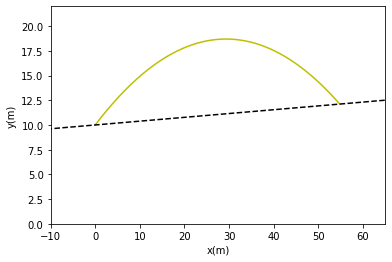

In [43]:
fig = plt.figure()
plt.plot(s_x_array, s_y_array, 'y-')
plt.plot(p[:, 0], p[:, 1], 'k--', ) # индексация матриц
# p[:, 0] - по всему массиву, элементы с индексом 0
# p[:, 1] - по всему массиву, элементы с индексом 1
plt.xlabel('x(m)'); plt.ylabel('y(m)')
plt.axis([-10, s_end + 10, 0, h_end + 10])

Для построения касательной прямой использую уравнение прямой по точке $p_0 \left( x_0, y_0 \right)$ и угловому коэффициенту $k$
$$y = k \left( x - x_0 \right) + y_0$$

In [135]:
# Когда я делал, почему-то решил, что мне нужна касательная в случайный момент времени

# установил и подключил модуль со случайными числами, 
# чтобы получать номер случайной точки графика параметрически заданной функции,
# к которой рисую касательную
# нахожу такой случайный номер из массива параметров (секунд), по которым строились s_x_array и s_y_array
r_num = rnd.randint(0, len(t_array))
# массив - случайная точка, можно было и список
p0_sec = np.array([s_x_array[r_num], s_y_array[r_num]])
# посчитал коэффициент параметрически заданной функции, то есть производную y'(x) = y'(t) / x'(t)
# производная так же зависит от параметра, его номер уже получен в переменной r_num
koef = v0_y / v0_x - g * t_array[r_num] / v0_x
# получаю точки прямой, в качестве аргумента у меня значения, например, x от 0 до 100 (не включая)
# можно было и не так много точек
p_sec = [koef * (i - p0_sec[0]) + p0_sec[1] for i in [0, 60]]

(-10.0, 65.0, 0.0, 22.0)

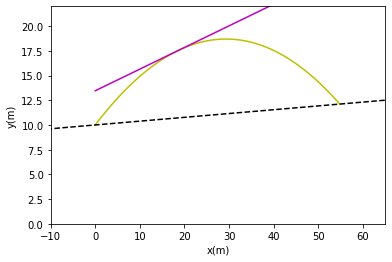

In [136]:
plt.figure()
plt.plot(s_x_array, s_y_array, 'y-')
plt.plot(p[:, 0], p[:, 1], 'k--', )
plt.plot([0, 60], p_sec, 'm-', )
plt.xlabel('x(m)'); plt.ylabel('y(m)')
plt.axis([-10, s_end + 10, 0, h_end + 10])

## Задание 1.4. (Определение времени, когда запущенное тело коснется земли)

Для задачи о падении тела определите время касания телом земли (время нахождения тела в воздухе).
$\color{red}{Реализацию}$ $\color{red}{осуществите}$ $\color{red}{двумя}$ $\color{red}{способами.}$
1. $\textbf{Точное решение:}$ время касания находится из решения квадратного уравнения $s_y \left( t \right) = 0;$
2. $\textbf{Приближенное решение:}$
    * Постройте последовательность $s_y$ на временное отрезке $\left[ 0, t_{stop} \right]$, чтобы момент касания тела земли $t^*$ попадал в выбранный отрезок $t^* \in \left[ 0, t_{stop} \right]$. Отметим, что $t_{stop}>T$.
    * Найдите в построенной последовательности $s_y$ два соседних элемента последовательности, значения которых меняют знак, т. е. $s_y \left[ k \right] s_y \left[ k + 1 \right] < 0$. Это означает, что $0 \in \left( s_y \left[ k \right], s_y \left[ k + 1 \right] \right)$.
    * Осуществите линейную интерполяцию по двум точкам $\left( t \left[ k \right], s_y \left[ k \right] \right)$ и $\left( t \left[ k + 1 \right], s_y \left[ k + 1 \right] \right)$ для нахождения времени $t^* \in \left( t \left[ k \right], t \left[ k + 1\right] \right)$ из условия $s_y \left( t^* \right) \approx 0$. Другими словами, по координатам двух точек необходимо построить отрезок и найти на этом отрезке координаты точки $ \left( t^*, 0 \right)$.
    
$\color{red}{Сравните}$ точное решение (решение квадратного уравнения) и приближенное решение $t^*$.

## Реализация задания 1.4

Для решения алгебраического уравнения $s_y \left( t \right)$ использую функцию $\textbf{solve}$ из модуля $\textbf{sympy}$, предварительно задав символьную переменную $t$ с помощью функции $\textbf{symbols}$

In [137]:
t = sympy.symbols('t')
result = sympy.solve(h_start + v0_y * t - g * t ** 2 / 2, t)
result

[-0.620975225909380, 3.28412399719520]

In [138]:
t_star_exact = result[-1]
t_star_exact

3.28412399719520

In [141]:
# приближенное решение
# 1) строю отрезок, допустим, t_stop = 10 сек
t_stop = 10
step = 0.01
fall_seq = [step * i for i in range(int(t_stop / 0.01))]
# последовательность
s_y_list_xtd = [h_start + v0_y * i - g * i ** 2 / 2 for i in fall_seq]

In [142]:
# два соседних элемента, значения которых меняют знак:
k = 0
while s_y_list_xtd[k] * s_y_list_xtd[k + 1] > 0:
    k = k + 1
print(s_y_list_xtd[k], s_y_list_xtd[k + 1])

0.07888559999999245 -0.11268685000000289


In [143]:
# линейная интерполяция
my_line_x = np.array([fall_seq[k], fall_seq[k + 1]]) # x_1, x_2
my_line_y = np.array([s_y_list_xtd[k], s_y_list_xtd[k + 1]]) # y_1, y_2
my_line_y

array([ 0.0788856 , -0.11268685])

(-0.025, 0.025)

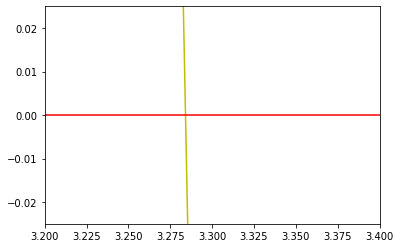

In [144]:
plt.figure()
plt.plot(my_line_x, my_line_y, 'y-')
# ну и прямая линия
plt.plot([3, 4], [0, 0], 'r-')
plt.xlim(3.2, 3.4)
plt.ylim(-0.025, 0.025)

In [147]:
# составлю уравнение по двум точкам и подставлю y = 0, тем самым определю x = t*
y = 0
x = sympy.symbols('x')
t_star = sympy.solve((y - s_y_list_xtd[k]) * (fall_seq[k + 1] - fall_seq[k]) - (x - fall_seq[k]) * (s_y_list_xtd[k + 1] - s_y_list_xtd[k]))
t_star = t_star[0]
print(t_star_exact, t_star)

3.28412399719520 3.28411779459939


In [149]:
# чем больше "точнее" разбмение, тем точнее ответ
t_star_exact == t_star

False